In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

sns.set_theme(style="darkgrid")

# 1

## a

Finding a polynomial of $\deg{P(t)} \leq 2$ that exactly goes throught the three first points

In [2]:
t = np.arange(4)
y = np.array([1, 2, 7, 5])

In [3]:
div_diff = lambda x_i, x_j, y_i, y_j: (y_i - y_j) / (x_i - x_j)

results = np.zeros((3, 4))

results[:, 0] = t[:3]
results[:, 1] = y[:3]

results[0, 2] = div_diff(results[0, 0], results[1, 0], results[0, 1], results[1, 1])
results[1, 2] = div_diff(results[1, 0], results[2, 0], results[1, 1], results[2, 1])
results[0, 3] = div_diff(results[2, 0], results[0, 0], results[1, 2], results[0, 2])
print(results)

[[0. 1. 1. 2.]
 [1. 2. 5. 0.]
 [2. 7. 0. 0.]]


From the above calculations the top row from its first element is the coefficients of the polynomial

In [4]:
P_2 = lambda t: results[0, 1] + results[0, 2] * (t - results[0, 0]) + results[0, 3] * (t - results[0, 0]) * (t - results[1, 0])

Therefore the polynomial is $P_2(t) = 2t^2 - 2t + 1$, verifying the result:

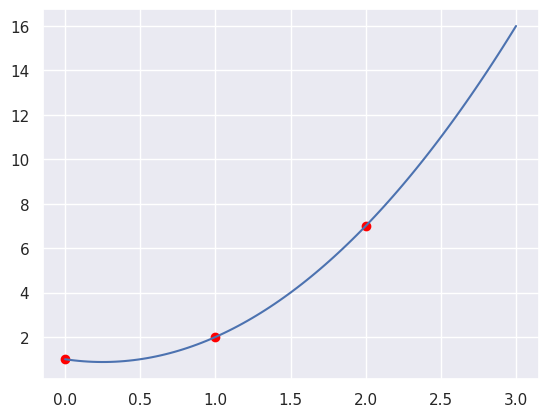

In [5]:
plt.scatter(t[:3], y[:3], color="red")
t_arr = np.linspace(0, 3, 100)
plt.plot(t_arr, P_2(t_arr))
plt.show()

This line goes through all three points exactly

## b

Now we find a polynomial of degree 2 that fit the four points provided. It should minimize the sum $\sum_{i=1}^4(S(t_i) - y_i)^2$

Therefore using,

$$
\renewcommand{\vec}[1]{\begin{bmatrix}#1\end{bmatrix}}
\begin{align*}
    S(t) &= at^2 + bt + c\\
    S(0) &= 0 + 0 + c = 1\\
    S(1) &= a + b + c = 2\\
    S(2) &= 4a + 2b + c = 7\\
    S(3) &= 9a + 3b + c = 5\\
    \implies Ax&=b = 
    \vec{0 & 0 & 1 \\ 1 & 1 & 1 \\ 4 & 2 & 1 \\ 9 & 3 & 1}\vec{a\\ b\\ c} = \vec{1 \\ 2 \\ 7 \\ 5}
\end{align*}
$$

Now we use normal equations to find the least squares solution: 

$$
A^TA\hat x = A^T b
$$

In [6]:
A = np.array([
    [0, 0, 1],
    [1, 1, 1],
    [4, 2, 1],
    [9, 3, 1]
])

b = np.array([1, 2, 7, 5])

lhs = A.T @ A
rhs = A.T @ b

x = np.linalg.solve(lhs, rhs)
print(x)

[-0.75  3.95  0.45]


The solution to this system is $a = -0.75, b = 3.95, c = 0.45$, resulting in,

$$S(t) = -0.75t^2 + 3.95t + 0.45$$

Verifying the results:

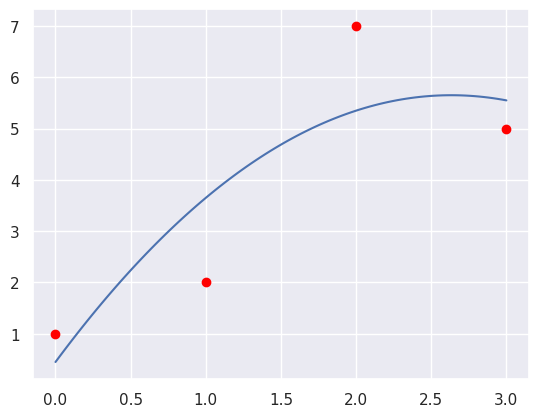

In [7]:
plt.scatter(t, y, color="red")

# Construct function from coefficients
S_t = lambda t: x[0] * t**2 + x[1] * t + x[2]

plt.plot(t_arr, S_t(t_arr))
plt.show()

This curve is interpolating the datapoints well.

## c

Given the matrix $B = \begin{bmatrix}1&0\\1&1\\1&2\\1&3\end{bmatrix}$ we are to find the reduced $QR$ factorization of $B$, that is we express $B$ as $B = QR$, where $Q = \begin{bmatrix}q_1&q_2\end{bmatrix}$

In [8]:
B = np.array([[1, 1, 1, 1], [0, 1, 2, 3]]).T

# First column of B
y_1 = A_1 = B[:, 0]
A_2 = B[:, 1]
r_11 = np.linalg.norm(y_1)
q_1 = y_1 / r_11

# Second column of B
y_2 = A_2 - q_1 * (q_1.T @ A_2)
r_22 = np.linalg.norm(y_2)
q_2 = y_2 / r_22

# Results
Q = np.array([q_1, q_2]).T
print(f"Q = \n{Q}")

r_12 = q_1.T @ A_2
R = np.array([[r_11, r_12], [0, r_22]])
print(f"R = \n{R}")

Q = 
[[ 0.5        -0.67082039]
 [ 0.5        -0.2236068 ]
 [ 0.5         0.2236068 ]
 [ 0.5         0.67082039]]
R = 
[[2.         3.        ]
 [0.         2.23606798]]


The results are

$$B = \begin{bmatrix}0.5 & -0.67082039\\ 0.5 & -0.2236068\\ 0.5 & 0.2236068\\ 0.5 & 0.67082039\end{bmatrix}$$

Let us verify that this makes sense by checking $B = QR$

In [9]:
try:
    assert np.allclose(Q @ R, B)
except AssertionError:
    print("Q @ R != B")
else:
    print("Q @ R == B")

Q @ R == B


# d

Are going to find a polynomial of $\deg{P_1(t)} \leq 1$

To do this we can use a property of the orthogonal matrix $Q$, that is $Q^{-1}=Q^T$, and $Q$ must of course be square for this to be true.

We begin with what we know:

$$
\begin{align*}
    B &= QR\\
    Bx &= b\\
    \implies QRx &=b\\
    Q^{-1}QRx &= Q^{-1}b\\
    Rx &= Q^{T}b\\
    R^{-1}Rx &= R^{-1}Q^Tb\\
    x &= R^{-1}Q^Tb
\end{align*}
$$

where $x = \begin{bmatrix}b\\ a\end{bmatrix}$ and we have our polynomial $U(t) = ax + b$

In [10]:
x = np.linalg.inv(R) @ Q.T @ b

print(f"coefficients: b = {x[0]}, a = {x[1]}")

coefficients: b = 1.2000000000000002, a = 1.7


Therefore we get the polynomial $U(t) = 1.2x + 1.7$. Verifying our results:

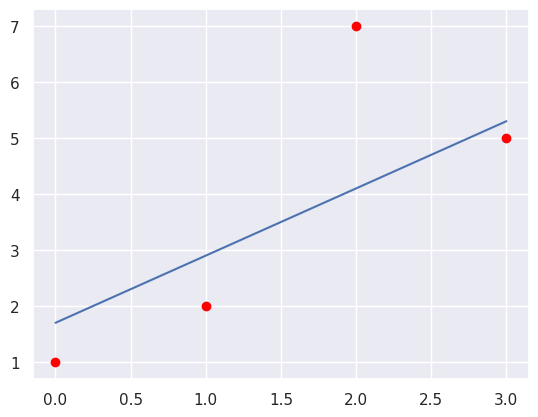

In [11]:
U = lambda t: x[0] * t + x[1]

plt.scatter(t, y, color="red")
plt.plot(t_arr, U(t_arr))
plt.show()

This line looks to be the best fit degreee 1 polynomial that fits all datapoints.